In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print('Libraries imported.')

Libraries imported.


In [4]:
url = '/content/titanic.csv'
df = pd.read_csv(url)

features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

df[features] = df[features].apply(pd.to_numeric, errors='coerce')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


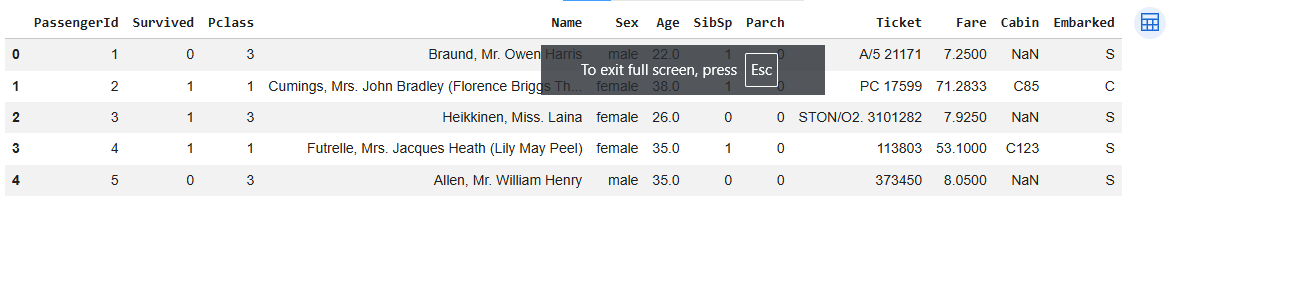

In [5]:
X = df[features]
y = df['Survived']

X.fillna(X.mean(), inplace=True)

/tmp/ipython-input-3962583964.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


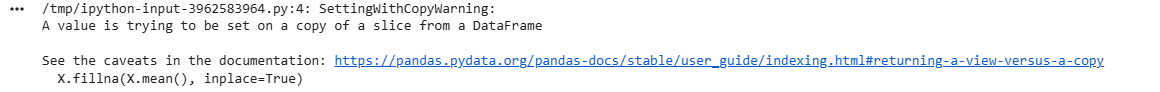

In [6]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
X = df[features].copy() # Use .copy() to avoid SettingWithCopyWarning
y = df['Survived']

X['Age'].fillna(X['Age'].mean(), inplace=True)

print(X.shape, y.shape)
print(X.head())

(891, 5) (891,)
   Pclass   Age  SibSp  Parch     Fare
0       3  22.0      1      0   7.2500
1       1  38.0      1      0  71.2833
2       3  26.0      0      0   7.9250
3       1  35.0      1      0  53.1000
4       3  35.0      0      0   8.0500


/tmp/ipython-input-935896013.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['Age'].fillna(X['Age'].mean(), inplace=True)


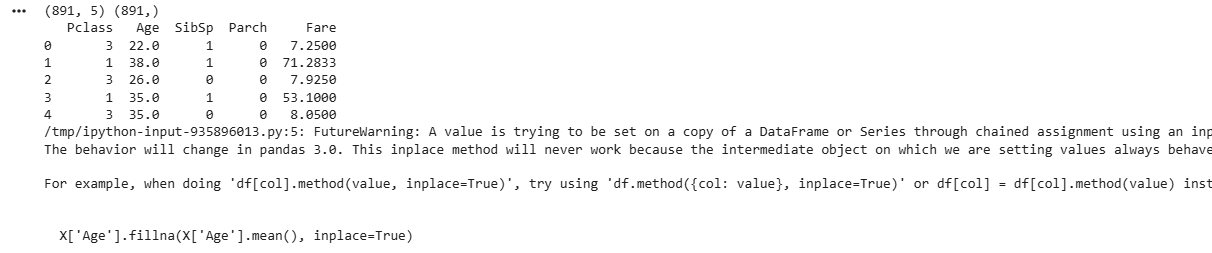

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

print('Train size:', X_train.shape)
print('Test size:', X_test.shape)

Train size: (623, 5)
Test size: (268, 5)


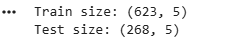

In [8]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print('Model trained.')

Model trained.


In [ ]:
y_pred = knn.predict(X_test)
list(y_pred)[:10]

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(1),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(1)]

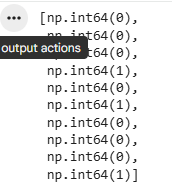

In [ ]:
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
results['Status'] = results.apply(lambda r: 'Correct' if r.Actual == r.Predicted else 'Wrong', axis=1)
results.head(20)

,Actual,Predicted,Status
0,1,0,Wrong
1,0,0,Correct
2,0,0,Correct
3,1,1,Correct
4,1,0,Wrong
5,1,1,Correct
6,1,0,Wrong
7,0,0,Correct
8,1,0,Wrong
9,1,1,Correct


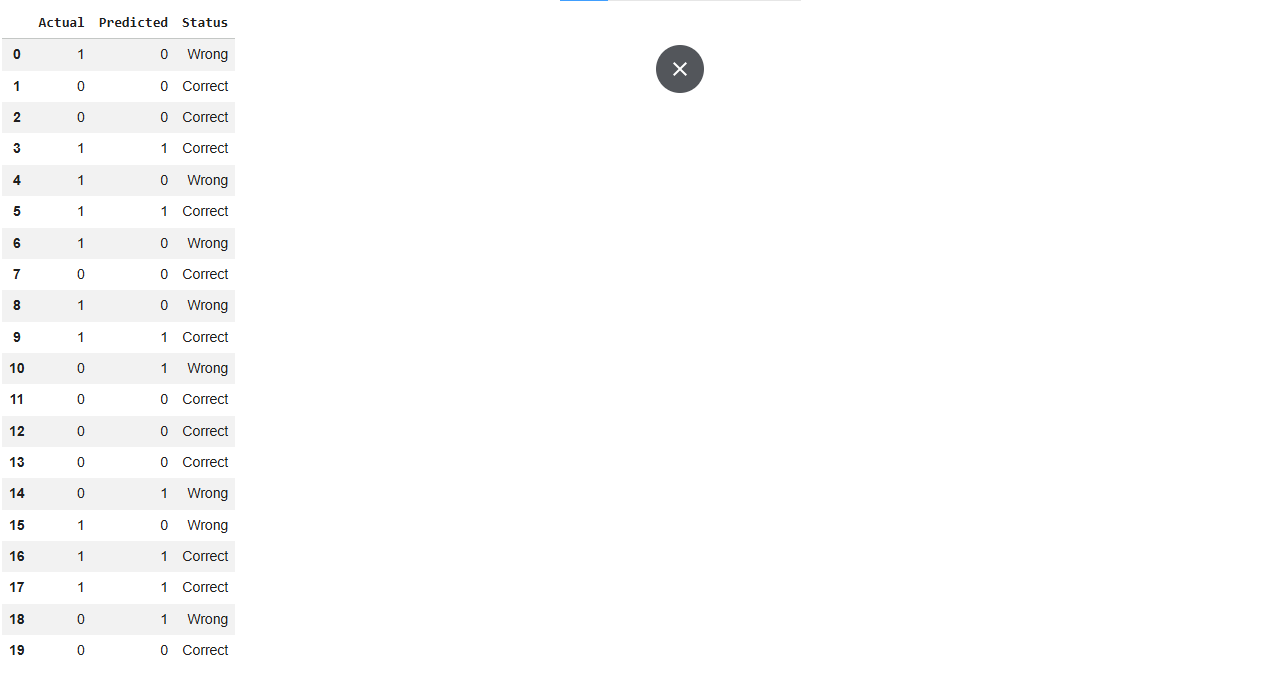

In [ ]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.6455223880597015

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.79      0.72       157
           1       0.60      0.44      0.51       111

    accuracy                           0.65       268
   macro avg       0.63      0.62      0.62       268
weighted avg       0.64      0.65      0.63       268


Confusion Matrix:
[[124  33]
 [ 62  49]]


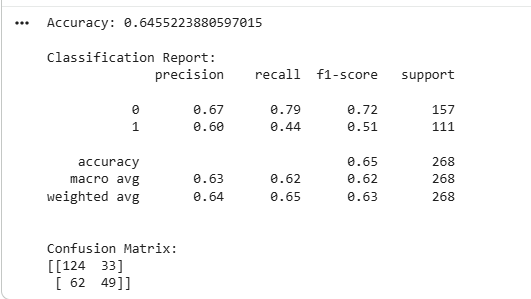

Conclusion

This experiment aimed to classify Titanic passengers as 'Survived' or 'Not Survived' using the k-Nearest Neighbors (kNN) algorithm. We followed these steps:

Data Loading and Preprocessing: The Titanic dataset was loaded, and relevant numerical features ('Pclass', 'Age', 'SibSp', 'Parch', 'Fare') were selected. Crucially, missing values in the 'Age' column were imputed with the mean of the 'Age' column to ensure all features were numerical and complete, as required by the kNN algorithm.

